# HARDWARE IN USE

In [ ]:
!nvidia-smi

Mon Jan  9 21:25:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Highest computation capability availabe

In [ ]:
!ls /usr/local/cuda-11.2/samples/1_Utilities/deviceQuery

deviceQuery.cpp  Makefile  NsightEclipse.xml  readme.txt


In [ ]:
%cd /usr/local/cuda-11.2/samples/1_Utilities/deviceQuery
!make
!./deviceQuery

/usr/local/cuda-11.2/samples/1_Utilities/deviceQuery
/usr/local/cuda-11.2/bin/nvcc -ccbin g++ -I../../common/inc  -m64    --threads 0 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_80,code=sm_80 -gencode arch=compute_86,code=sm_86 -gencode arch=compute_86,code=compute_86 -o deviceQuery.o -c deviceQuery.cpp
nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
/usr/local/cuda-11.2/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=comp

**CLONING REPO FROM GITHUB**

In [ ]:
%cd /content/
!git clone https://github.com/noe77778/DD2360_FinalProject

/content
Cloning into 'DD2360_FinalProject'...
remote: Enumerating objects: 2238, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 2238 (delta 102), reused 107 (delta 53), pack-reused 2063
Receiving objects: 100% (2238/2238), 41.49 MiB | 24.13 MiB/s, done.
Resolving deltas: 100% (1093/1093), done.


# DATA GENERATION

In [ ]:
%cd /content/DD2360_FinalProject/data/nn
!make hurricanegen
!./hurricanegen 327680 32
!./hurricanegen 171040 16
!./hurricanegen 85520 8

/content/DD2360_FinalProject/data/nn
gcc -std=c99 -o hurricanegen hurricanegen.c
Generated 327680 hurricanes in 32 file(s).
File list written to list320k_32.txt.
Generated 172032 hurricanes in 16 file(s).
File list written to list168k_16.txt.
Generated 86016 hurricanes in 8 file(s).
File list written to list84k_8.txt.


# Initial Profiling


In [ ]:
%cd /content/DD2360_FinalProject/cuda/nn
!nvcc -arch=sm_75 nn_cuda.cu -o Original_code

/content/DD2360_FinalProject/cuda/nn
nn_cuda.cu: In function ‘int main(int, char**)’:
nn_cuda.cu:113:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
  cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
nn_cuda.cu:119:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
  cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
nn_cuda.cu:168:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdep

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 5 
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./Original_code $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./Original_code $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      
  done
done

# Results

**Execute original datatype with float**

In [ ]:
!nvcc -arch=sm_75 float_DT.cu -o float_DT

float_DT.cu: In function ‘int main(int, char**)’:
float_DT.cu:98:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
    cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
float_DT.cu:104:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
    cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
float_DT.cu:160:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
     cud

Change number of returned records

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 5 
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./float_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./float_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
  done
done

+++++++++++++++++++++++++++++++++++ list84k_8 r 5 +++++++++++++++++++++++++++++++++++
==904== NVPROF is profiling process 904, command: ./float_DT list84k_8 -r 5 -lat 30 -lng 90
H2D Time: 0.0002151 (s)
Kernel Time: 0.0000510 (s)
D2H Time: 0.0001431 (s)
1972 12 10  6  8 DEBBY      29.6  89.8   84  178 --> Distance=0.447212
1951  7 15 18 24 BERYL      30.4  89.6   79  682 --> Distance=0.565686
1961 11 12  6  7 ERNESTO    29.3  90.3  134  627 --> Distance=0.761579
1957 12  6 18 24 HELENE     30.8  90.0   10  238 --> Distance=0.799999
1977 10 13  0  4 MICHAEL    29.2  89.5  126  117 --> Distance=0.943397
==904== Profiling application: ./float_DT list84k_8 -r 5 -lat 30 -lng 90
==904== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   61.55%  58.752us         1  58.752us  58.752us  58.752us  [CUDA memcpy HtoD]
                   29.60%  28.255us         1  28.255us  28.255us  28.255us  [CUDA memcpy DtoH]
                   

**Execute datatype as double**

In [ ]:
!nvcc -arch=sm_75 double_DT.cu -o double_DT

double_DT.cu: In function ‘int main(int, char**)’:
double_DT.cu:98:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
    cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
double_DT.cu:104:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
    cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
double_DT.cu:160:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
    

Change number of returned records

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 10 #500 50000 500000
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./double_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./double_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
  done
done

+++++++++++++++++++++++++++++++++++ list84k_8 r 10 +++++++++++++++++++++++++++++++++++
==1077== NVPROF is profiling process 1077, command: ./double_DT list84k_8 -r 10 -lat 30 -lng 90
H2D Time: 0.0003569 (s)
Kernel Time: 0.0000861 (s)
D2H Time: 0.0002739 (s)
1972 12 10  6  8 DEBBY      29.6  89.8   84  178 --> Distance=0.447214
1951  7 15 18 24 BERYL      30.4  89.6   79  682 --> Distance=0.565685
1961 11 12  6  7 ERNESTO    29.3  90.3  134  627 --> Distance=0.761577
1957 12  6 18 24 HELENE     30.8  90.0   10  238 --> Distance=0.800000
1977 10 13  0  4 MICHAEL    29.2  89.5  126  117 --> Distance=0.943398
1973 10 17 12  2 HELENE     29.1  90.3   80  525 --> Distance=0.948683
1978  7 22  0 21 LESLIE     29.6  89.1  123  370 --> Distance=0.984886
1962  9 17 12 14 TONY       30.6  90.8  157  172 --> Distance=1.000000
1968 10  9  6 22 BERYL      30.9  90.5  148  650 --> Distance=1.029563
1987  6 22  6 18 ISAAC      31.0  89.7  137  393 --> Distance=1.044031
==1077== Profiling application: 

**Execute datatype as fp16 (__half)**

In [ ]:
!nvcc -arch=sm_75 half_DT.cu -o half_DT

half_DT.cu: In function ‘int main(int, char**)’:
half_DT.cu:94:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
   cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
half_DT.cu:100:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
   cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
half_DT.cu:156:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
     cudaThrea

Change number of returned records

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 5 #500 50000 500000
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./half_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./half_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
  done
done

+++++++++++++++++++++++++++++++++++ list84k_8 r 5 +++++++++++++++++++++++++++++++++++
==1254== NVPROF is profiling process 1254, command: ./half_DT list84k_8 -r 5 -lat 30 -lng 90
H2D Time: 0.0000999 (s)
Kernel Time: 0.0000751 (s)
D2H Time: 0.0000870 (s)
1972 12 10  6  8 DEBBY      29.6  89.8   84  178 --> Distance=0.447510
1951  7 15 18 24 BERYL      30.4  89.6   79  682 --> Distance=0.552734
1961 11 12  6  7 ERNESTO    29.3  90.3  134  627 --> Distance=0.769043
1957 12  6 18 24 HELENE     30.8  90.0   10  238 --> Distance=0.796875
1977 10 13  0  4 MICHAEL    29.2  89.5  126  117 --> Distance=0.940430
==1254== Profiling application: ./half_DT list84k_8 -r 5 -lat 30 -lng 90
==1254== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   40.49%  31.392us         1  31.392us  31.392us  31.392us  euclid(latLong*, __half*, int, __half, __half)
                   39.95%  30.975us         1  30.975us  30.975us  30.975us  [CUDA me

**Execute datatype as bfloat16 (__nv_bfloat16)**

In [ ]:
!nvcc -arch=sm_75 bfloat16_DT.cu -o bfloat16_DT

bfloat16_DT.cu: In function ‘int main(int, char**)’:
bfloat16_DT.cu:95:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
   cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
bfloat16_DT.cu:101:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations]
   cudaThreadSynchronize();
                       ^
/usr/local/cuda/bin/../targets/x86_64-linux/include/cuda_runtime_api.h:1011:46: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                              ^~~~~~~~~~~~~~~~~~~~~
bfloat16_DT.cu:157:23: warning: ‘cudaError_t cudaThreadSynchronize()’ is deprecated [-Wdeprecated-declarations

In [ ]:
%%shell 
#!/bin/bash
PARA="r"
BOARDER="+++++++++++++++++++++++++++++++++++"
for FILE_NAME in "list84k_8" "list168k_16" "list320k_32" 
do
  for VARIABLE in 5 #500 50000 500000
  do
      echo $BOARDER $FILE_NAME $PARA $VARIABLE $BOARDER
      nvprof ./bfloat16_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
      ncu ./bfloat16_DT $FILE_NAME -r $VARIABLE -lat 30 -lng 90
  done
done

+++++++++++++++++++++++++++++++++++ list84k_8 r 5 +++++++++++++++++++++++++++++++++++
==1431== NVPROF is profiling process 1431, command: ./bfloat16_DT list84k_8 -r 5 -lat 30 -lng 90
H2D Time: 0.0001030 (s)
Kernel Time: 0.0000830 (s)
D2H Time: 0.0000889 (s)
1972 12 10  6  8 DEBBY      29.6  89.8   84  178 --> Distance=0.375000
1951  7 15 18 24 BERYL      30.4  89.6   79  682 --> Distance=0.625000
1957 12  6 18 24 HELENE     30.8  90.0   10  238 --> Distance=0.750000
1961 11 12  6  7 ERNESTO    29.3  90.3  134  627 --> Distance=0.902344
1977 10 13  0  4 MICHAEL    29.2  89.5  126  117 --> Distance=0.902344
==1431== Profiling application: ./bfloat16_DT list84k_8 -r 5 -lat 30 -lng 90
==1431== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   48.89%  44.416us         1  44.416us  44.416us  44.416us  euclid(latLong*, __nv_bfloat16*, int, __nv_bfloat16, __nv_bfloat16)
                   34.38%  31.231us         1  31.231us 

Plot

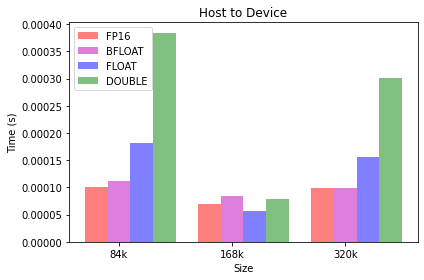

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np

# data to plot
n_groups = 3
FLOAT = (0.0001810, 0.0000570, 0.0001559)
DOUBLE = (0.0003841, 0.0000780, 0.0003009)
FP16 = (0.0001011, 0.0000701, 0.0000989)
BFLOAT = (0.0001111, 0.0000851, 0.0000989)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.5

rects1 = plt.bar(index, FP16, bar_width,
alpha=opacity,
color='r',
label='FP16')

rects2 = plt.bar(index + bar_width, BFLOAT, bar_width,
alpha=opacity,
color='m',
label='BFLOAT')

rects3 = plt.bar(index + bar_width*2, FLOAT, bar_width,
alpha=opacity,
color='b',
label='FLOAT')

rects4 = plt.bar(index + bar_width*3, DOUBLE, bar_width,
alpha=opacity,
color='g',
label='DOUBLE')



plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Host to Device')
plt.xticks(index + bar_width, ("84k", "168k", "320k"))
plt.legend()

plt.tight_layout()
plt.show()

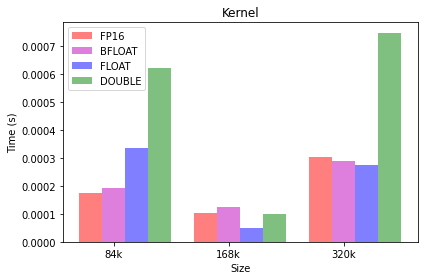

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
FLOAT = (0.0003369, 0.0000510, 0.0002749)
DOUBLE = (0.0006220, 0.0001011, 0.0007479)
FP16 = (0.0001740, 0.0001020, 0.0003049)
BFLOAT = (0.0001931, 0.0001230, 0.0002890)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.5

rects1 = plt.bar(index, FP16, bar_width,
alpha=opacity,
color='r',
label='FP16')

rects2 = plt.bar(index + bar_width, BFLOAT, bar_width,
alpha=opacity,
color='m',
label='BFLOAT')

rects3 = plt.bar(index + bar_width*2, FLOAT, bar_width,
alpha=opacity,
color='b',
label='FLOAT')

rects4 = plt.bar(index + bar_width*3, DOUBLE, bar_width,
alpha=opacity,
color='g',
label='DOUBLE')



plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Kernel')
plt.xticks(index + bar_width, ("84k", "168k", "320k"))
plt.legend()

plt.tight_layout()
plt.show()

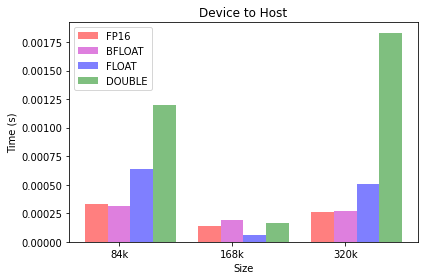

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
FLOAT = (0.0006411, 0.0000610, 0.0005059)
DOUBLE = (0.0011971, 0.0001609, 0.0018301)
FP16 = (0.0003340, 0.0001409, 0.0002601)
BFLOAT = (0.0003109, 0.0001919, 0.0002680)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.5

rects1 = plt.bar(index, FP16, bar_width,
alpha=opacity,
color='r',
label='FP16')

rects2 = plt.bar(index + bar_width, BFLOAT, bar_width,
alpha=opacity,
color='m',
label='BFLOAT')

rects3 = plt.bar(index + bar_width*2, FLOAT, bar_width,
alpha=opacity,
color='b',
label='FLOAT')

rects4 = plt.bar(index + bar_width*3, DOUBLE, bar_width,
alpha=opacity,
color='g',
label='DOUBLE')



plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Device to Host')
plt.xticks(index + bar_width, ("84k", "168k", "320k"))
plt.legend()

plt.tight_layout()
plt.show()